In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

In [16]:
cab_data = pd.read_csv("cab_data/Cab_Data.csv")
city_data = pd.read_csv("cab_data/City.csv")
customer_data = pd.read_csv("cab_data/Customer_ID.csv")
transaction_data = pd.read_csv("cab_data/Transaction_ID.csv")

In [17]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})

In [18]:
for col in transaction_data.columns:
    if ' ' in col:
        transaction_data = transaction_data.rename(columns={col:col.replace(' ','_')})

In [19]:
for col in customer_data.columns:
    if ' ' in col:
        customer_data = customer_data.rename(columns={col:col.replace(' ','_')})

In [20]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [21]:
original_date = cab_data['Date_of_Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in original_date]

cab_data['Date_of_Travel'] = pd.to_datetime(dates, format='%y/%m/%d')


In [22]:
cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [23]:
cab_data.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [24]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [25]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,PITTSBURGH PA,"629,591","7,044"
freq,1,1,1


In [26]:
customer_data.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [27]:
customer_data.describe()

,Customer_ID,Age,Income_(USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [28]:
transaction_data.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [29]:
transaction_data.describe()

,Transaction_ID,Customer_ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


merge data together

In [30]:
a = pd.merge(cab_data, city_data)
b = pd.merge(a, transaction_data)
master_data = pd.merge(b, customer_data)

In [31]:
master_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


check for missing values

In [39]:
print('\nNumber of missing values by columns :') 
master_data.isnull().sum()


Number of missing values by columns :


Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Population            0
Users                 0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [40]:
master_data.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income_(USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [41]:
master_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer_ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income_(USD/Month)  359392 no

# Exploratory Data Analysis

Which company had more customers - Yellow cab had more transaction

In [43]:
plot1 = master_data.groupby('Company')['Transaction_ID'].count()


In [44]:
plot1

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

Text(0, 0.5, 'Transactions')

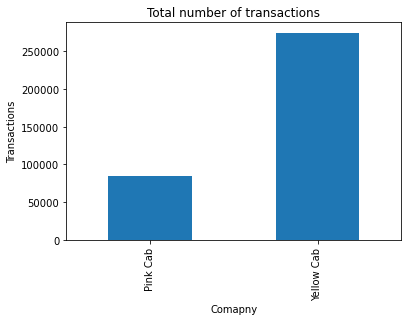

In [47]:
transaction_plot = plot1.plot(kind='bar',legend=None,title="Total number of transactions")
transaction_plot.set_xlabel("Comapny")
transaction_plot.set_ylabel("Transactions")

In [48]:
year = master_data

In [49]:
year['year'] = pd.DatetimeIndex(cab_data['Date_of_Travel']).year


In [50]:
year

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813,2016
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813,2016
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813,2016
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237,2016
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001",51406,Cash,Female,29,6829,2018
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001",51406,Cash,Female,29,6829,2018
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001",51406,Card,Female,29,6829,2018
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001",51406,Cash,Female,29,6829,2018


In [51]:
year.groupby('Company')['year'].value_counts().sort_values(ascending=False)


Company     year
Yellow Cab  2017    94168
            2018    92750
            2016    87763
Pink Cab    2017    33796
            2018    30456
            2016    20459
Name: year, dtype: int64

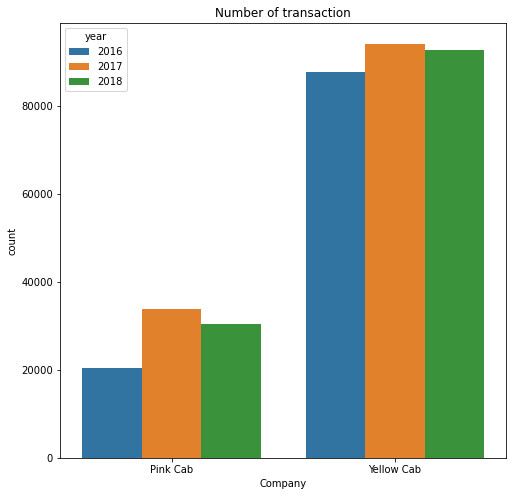

In [53]:
fig, ax= plt.subplots(figsize=(8,8))

ax = sns.countplot(x='Company', data=year, hue='year').set_title("Number of transaction")

Which company made more profit 

In [47]:
profit = master_data

In [48]:
profit['Profit'] = profit['Price_Charged'] - profit['Cost_of_Trip']


In [56]:
profit

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),year,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813,2016,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813,2016,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813,2016,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237,2016,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237,2016,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001",51406,Cash,Female,29,6829,2018,143.6180
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001",51406,Cash,Female,29,6829,2018,23.0464
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001",51406,Card,Female,29,6829,2018,-5.8540
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001",51406,Cash,Female,29,6829,2018,-6.0900


In [57]:
correlations = profit.corr()


In [58]:
correlations

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income_(USD/Month),year,Profit
Transaction_ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.015954,-0.087130
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.000390,0.462768
Price_Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.078864,0.864154
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,-0.007351,0.486056
Customer_ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,0.100240,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.014019,-0.005093
Income_(USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,-0.008250,0.006148
year,0.015954,-0.000390,0.078864,-0.007351,0.100240,-0.014019,-0.008250,1.000000,0.142223
Profit,-0.087130,0.462768,0.864154,0.486056,-0.306527,-0.005093,0.006148,0.142223,1.000000


In [59]:
print(correlations["Profit"])


Transaction_ID       -0.087130
KM_Travelled          0.462768
Price_Charged         0.864154
Cost_of_Trip          0.486056
Customer_ID          -0.306527
Age                  -0.005093
Income_(USD/Month)    0.006148
year                  0.142223
Profit                1.000000
Name: Profit, dtype: float64


array([<AxesSubplot:ylabel='Profit'>], dtype=object)

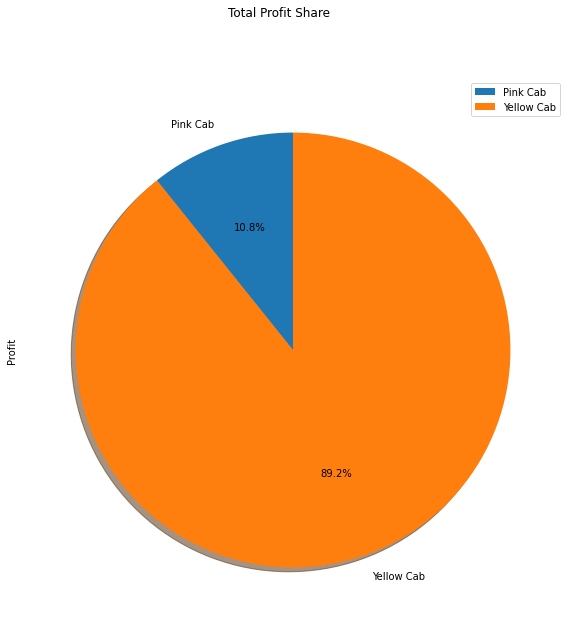

In [60]:
profit.groupby(['Company']).sum().plot(kind='pie', y='Profit', subplots=True, shadow = True,startangle=90, figsize=(15,10), title="Total Profit Share", autopct='%1.1f%%')

In [61]:
plot5 = profit.groupby('Company')['Profit'].sum()


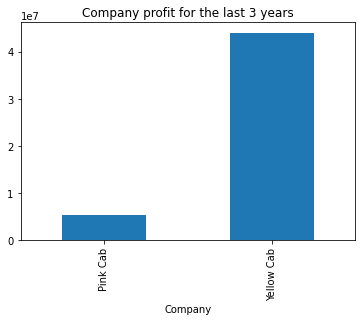

In [62]:
my_plot2 = plot5.plot(kind='bar',legend=None,title="Company profit for the last 3 years")


Which cab company had a more customer in each city 

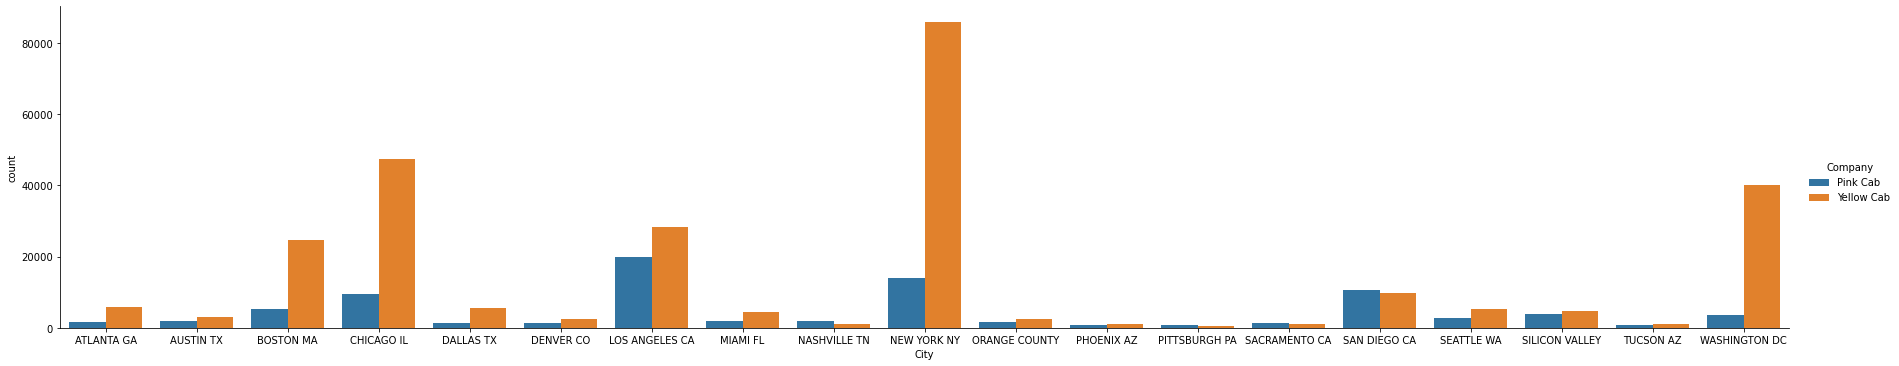

In [63]:
sns.catplot(data=profit, x='City', kind='count', hue='Company', aspect=5)


Which gender uses cab service more

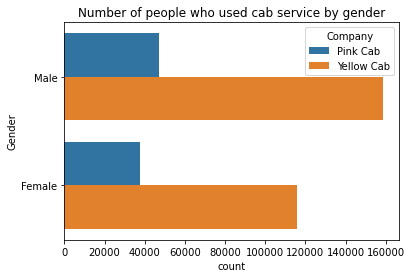

In [64]:
ax = sns.countplot(y=master_data["Gender"], hue=master_data["Company"])
plt.title("Number of people who used cab service by gender")
plt.show()

How do customers pay for the cab service

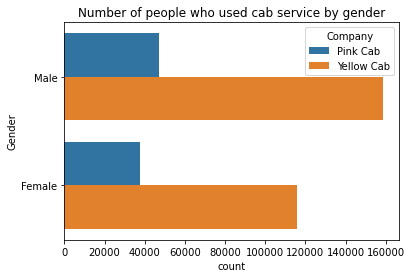

In [65]:
ax = sns.countplot(y=master_data["Gender"], hue=master_data["Company"])
plt.title("Number of people who used cab service by gender")
plt.show()

Which age uses cab service more

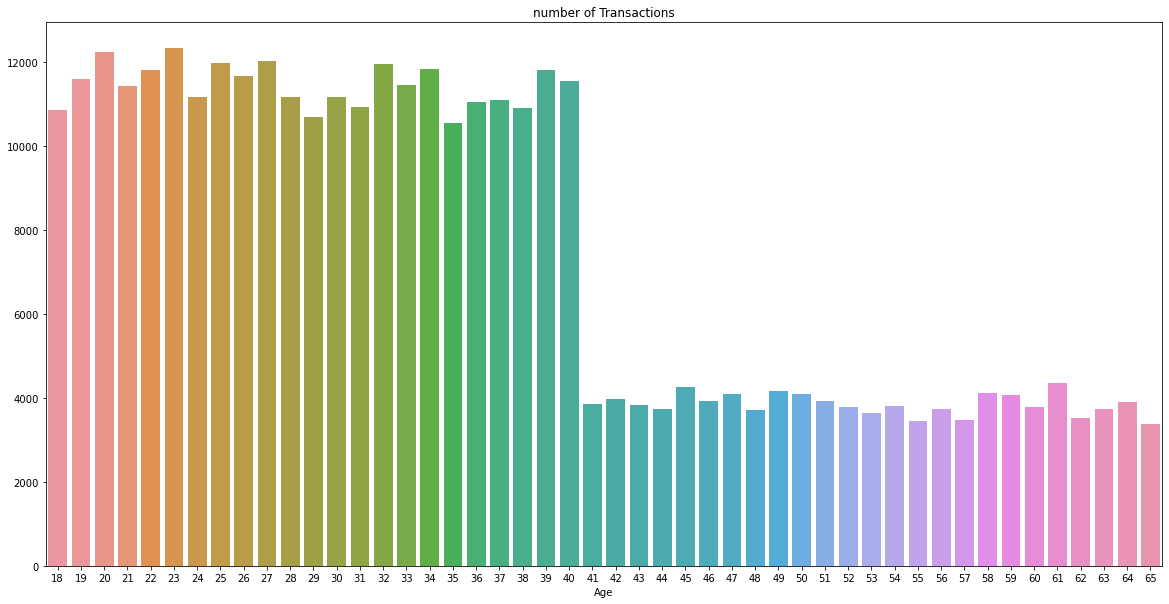

In [67]:
age = combine_data.groupby('Age')['Transaction_ID'].count()

plt.figure(figsize=(20,10))
sns.barplot(x=age.index,y=age.values)
plt.xlabel('Age')
plt.title('number of Transactions')
plt.show()

Top 10 customers

In [34]:
master_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [44]:
master_data['Customer_ID'].value_counts().head(10)

494     54
2939    53
2766    51
1070    51
126     50
944     50
858     50
1803    50
1067    50
1628    50
Name: Customer_ID, dtype: int64

# Hypothesis

In [45]:
from scipy import stats

def t_test(a,b):
    _, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
    if(p_value<0.05):
        print("We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence")
    else:
        print("We Fail to reject Null Hypothesis as there is no enough evidence to reject it")
    
    print("P value is ", p_value)

H0: Males bring in less profits than female for Yellow Cab.

H1: Males bring in more profits than females for Yellow Cab.

In [55]:
a = profit[(profit.Gender=='Female')&(profit.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = profit[(profit.Gender=='Male')&(profit.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
t_test(a,b)

We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence
P value is  6.060473042494144e-25


H0: Males bring in less profits than female for Pink Cab.

H1: Males bring in more profits than females for Pink Cab.

In [54]:
a = profit[(profit.Gender=='Female')&(profit.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = profit[(profit.Gender=='Male')&(profit.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.11515305900425798


H0: No signifcant difference between distance travelled by men and distance travelled by women for Yellow cab

H1: Signifcant difference between distance travelled by men and distance travelled by women for Yellow cab

In [53]:
a = master_data[(master_data.Gender=='Female')&(combine_data.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = master_data[(master_data.Gender=='Male')&(combine_data.Company=='Yellow Cab')].groupby('Transaction_ID').KM_Travelled.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.5146654429411317


H0: No signifcant difference between distance travelled by men and distance travelled by women for Pink cab

H1: Signifcant difference between distance travelled by men and distance travelled by women for Pink cab

In [52]:
a = master_data[(master_data.Gender=='Female')&(combine_data.Company=='Pink Cab')].groupby('Transaction_ID').KM_Travelled.mean()
b = master_data[(master_data.Gender=='Male')&(combine_data.Company=='Pink Cab')].groupby('Transaction_ID').KM_Travelled.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.6164626165258722


H0: There is no difference in Profits for Card and Cash Payers for Yellow Cab.

H1: There is a difference in Profits for Card and Cash Payers for Yellow Cab.

In [56]:
a = profit[(profit.Payment_Mode=='Cash')&(profit.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = profit[(profit.Payment_Mode=='Card')&(profit.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.2933060638298729


H0: There is no difference in Profits for Card and Cash Payers for Pink Cab.

H1: There is a difference in Profits for Card and Cash Payers for Pink Cab.

In [57]:
a = profit[(profit.Payment_Mode=='Cash')&(profit.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = profit[(profit.Payment_Mode=='Card')&(profit.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.7900465828793288


H0: There is no difference in Profits for customers over age 35 or under 35 for Yellow Cab.

H1: There is a difference in Profits for customers over age 35 or under 35 for Yellow Cab.


In [58]:
a = profit[(profit.Age<=35)&(profit.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = profit[(profit.Age>35)&(profit.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.799055947701806


H0: There is no difference in Profits for customers over age 35 or under 35 for Pink Cab.

H1: There is a difference in Profits for customers over age 35 or under 35 for Pink Cab.


In [60]:
a = profit[(profit.Age<=35)&(profit.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = profit[(profit.Age>35)&(profit.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
t_test(a,b)

We Fail to reject Null Hypothesis as there is no enough evidence to reject it
P value is  0.0805441093843564
